# Purpose of this simulation


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tables
import aopy

import numpy as np
np.set_printoptions(precision=5, suppress=True)
sns.set_context('talk')

In [2]:
import aopy
import tables
import os

def load_feature_selection_files(data_dump_folder, exp_conds):
    """
    load feature selection from data dump folder
    
    Args;
    
    Returns:
        exp_data_all: a list of exp_data as parsed by bmi3d
        exp_data_metadata_all: a list of exp_metadata as parsed by bmi3d
    """

    exp_data_all = list()
    exp_data_metadata_all = list()

    for e in exp_conds:
        files = {'hdf':e+'.h5'}
        file_name = files['hdf']
        
        try:
            d,m = aopy.preproc.parse_bmi3d(data_dump_folder, files)

            #also load the clda and feature selection files

            feature_selection_data = aopy.data.load_hdf_group(data_dump_folder, file_name,'feature_selection')
            d['feature_selection'] =  feature_selection_data
            
            exp_data_all.append(d)
            exp_data_metadata_all.append(m)
            
        except:
            print(f'cannot parse {e}')
            
        print(f'finished {e}')

        
    return (exp_data_all, exp_data_metadata_all)


def iterate_exp_data(data_dump_folder, exp_conds):
    
    for e in exp_conds:
        files = {'hdf':e+'.h5'}
        file_name = files['hdf']
        
        try:
            d,m = aopy.preproc.parse_bmi3d(data_dump_folder, files)

            #also load the clda and feature selection files

            feature_selection_data = aopy.data.load_hdf_group(data_dump_folder, file_name,'feature_selection')
            d['feature_selection'] =  feature_selection_data
            
            yield d,m
        except:
            print(f'cannot parse {e}')

        
def preproc_feature_selection_data(data_dump_folder, 
                                   exp_conds, 
                                  preproc_folder):
    

    for e in exp_conds:
        
        files = {'hdf':e+'.h5'}
        file_name = files['hdf']
        
        processed_file_name = 'preproc_'+ file_name
        
        aopy.preproc.proc_exp(data_dump_folder, 
                              files, 
                              preproc_folder, 
                              processed_file_name)
        
        
        feature_selection_data = aopy.data.load_hdf_group(data_dump_folder, file_name,'feature_selection')

    
        aopy.data.save_hdf(preproc_folder, processed_file_name,
                          feature_selection_data,
                           'feature_selection',
                           append = True)
        
        print(f'finished processing {e}')
        
def iter_proc_files(preproc_folder, exp_conds):
    """
    this function returns an iterator that at each iteration,
    returns a tuple of exp_data, exp_metadata
    """
    
    
    
    
    for i in exp_conds:
        
        files = {'hdf':i+'.h5'}
        file_name = files['hdf']
        
        processed_file_name = 'preproc_'+ file_name
        
               # Load the preprocessed experimental data
        try:
            exp_data = aopy.data.load_hdf_group(preproc_folder,
                                                processed_file_name, 'exp_data')
            exp_metadata = aopy.data.load_hdf_group(preproc_folder, 
                                                    processed_file_name, 'exp_metadata')
        
            feature_selection_data = aopy.data.load_hdf_group(preproc_folder, 
                                                              processed_file_name, 'feature_selection')
        except (FileNotFoundError, ValueError):
            raise ValueError(f"File {i} does not exist")
        
        exp_data['feature_selection'] = feature_selection_data

        yield (exp_data, exp_metadata)

        
def make_exp_conds(sim_data = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/',
                  within_folder = 'diff_neurons',
                  preproc_sim_folder = 'diff_neurons_preproc/',
                  n_neurons = [32, 128, 512, 1024], 
                  random_seeds = [0],
                  percent_high_SNR_noises = [0.7]):
    N_RUNS = 10


    data_dump_folder = sim_data + within_folder
    preproc_folder = sim_data + preproc_sim_folder

    percent_high_SNR_noises = [0.7]

    exp_conds = [f'wo_FS_{0.7}_{rr}_{nn}'\
                 for rr in random_seeds\
                 for nn in n_neurons
                ]
   
    exp_conds_add = [f'iter_{0.7}_{rr}_{nn}'\
                     for rr in random_seeds\
                     for nn in n_neurons
                    ]
    
    exp_conds_keep = [f'same_{0.7}_{rr}_{nn}'\
                      for rr in random_seeds\
                      for nn in n_neurons
                     ]

    exp_conds.extend(exp_conds_add)
    exp_conds.extend(exp_conds_keep)
    
    return data_dump_folder, preproc_folder, exp_conds 


# load first files 

# Check feature selection strategies

In [3]:
load_feature_selection_files?

Signature: load_feature_selection_files(data_dump_folder, exp_conds)
Docstring:
load feature selection from data dump folder

Args;

Returns:
    exp_data_all: a list of exp_data as parsed by bmi3d
    exp_data_metadata_all: a list of exp_metadata as parsed by bmi3d
File:      ~/BMi3D_my/operation_funny_chicken/adaptive_feature_selection/old_files/<ipython-input-2-e34b3b0db47b>
Type:      function


## display the strategies

In [13]:
def plot_feature_selection(active_feat_set_list, ax = None):
    """
    plot the selection strategy map. 
    """
    from matplotlib import colors
    
    
        
    active_feat_heat_map = np.array(active_feat_set_list, dtype = np.int32)
    active_feat_heat_map = np.ma.masked_where(active_feat_heat_map == False, active_feat_heat_map)
    

    
    if ax is None: 
        fig, ax = plt.subplots()
        print(type(ax))
        
        #color true to yellow
    cmap = colors.ListedColormap(['yellow'])
    ax.imshow(active_feat_heat_map.T, cmap = cmap)

   
    cmap.set_bad(color='blue')

    ax.set_xlabel('Learner batch')
    ax.set_ylabel('Feature index')





## check between conditions

NameError: name 'exp_data_all_reshaped' is not defined

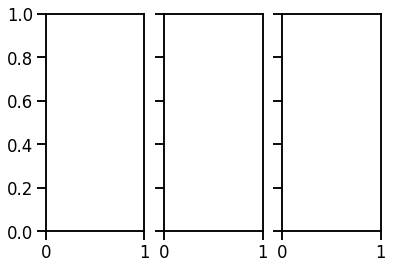

In [63]:
fig_feat_activity, ax_feat_activity = plt.subplots(1, 3, 
                                                   sharey = True)


for e, a in zip(exp_data_all_reshaped[:,1],  ax_feat_activity):
    plot_feature_selection(e['feature_selection']['feat_set'], ax = a)
    

# check across rows

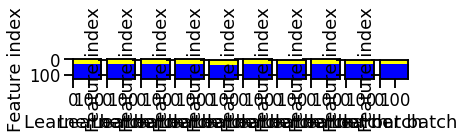

In [9]:
fig_feat_activity, ax_feat_activity = plt.subplots(1, 10, 
                                                   sharey = True)


for e, a in zip(exp_data_all_reshaped[2,:],  ax_feat_activity):
    plot_feature_selection(e['feature_selection']['feat_set'], ax = a)
    


# Behaviour comparision

## count how many rewards

In [43]:
exp_data_all[0]['events']['time'][-10:]




masked_array(data=[181574, 181674, 181687, 181688, 181776, 181788, 181789,
                   181860, 181873, 181874],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=999999,
            dtype=uint64)

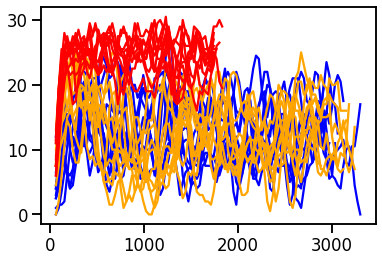

# Comparision of rewarded trials

In [6]:
N_RUNS = 10
n_neurons = [32]
 
sim_data = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/'


within_sim_data = "diff_neurons/"
preproc_sim_data = "diff_neurons_preproc/"

data_dump_folder = sim_data + within_sim_data
preproc_folder = sim_data + preproc_sim_data

percent_high_SNR_noises = [0.7]
random_seed = range(10)

exp_conds_add = [f'iter_{0.7}_{r}_{nn}' for nn in n_neurons for r in random_seed]
exp_conds_keep = [f'same_{0.7}_{r}_{nn}' for nn in n_neurons for r in random_seed]
exp_conds = [f'wo_FS_{0.7}_{r}_{nn}' for nn in n_neurons for r in random_seed]

exp_conds.extend(exp_conds_add)
exp_conds.extend(exp_conds_keep)

for e in exp_conds: print(e)

wo_FS_0.7_0_32
wo_FS_0.7_1_32
wo_FS_0.7_2_32
wo_FS_0.7_3_32
wo_FS_0.7_4_32
wo_FS_0.7_5_32
wo_FS_0.7_6_32
wo_FS_0.7_7_32
wo_FS_0.7_8_32
wo_FS_0.7_9_32
iter_0.7_0_32
iter_0.7_1_32
iter_0.7_2_32
iter_0.7_3_32
iter_0.7_4_32
iter_0.7_5_32
iter_0.7_6_32
iter_0.7_7_32
iter_0.7_8_32
iter_0.7_9_32
same_0.7_0_32
same_0.7_1_32
same_0.7_2_32
same_0.7_3_32
same_0.7_4_32
same_0.7_5_32
same_0.7_6_32
same_0.7_7_32
same_0.7_8_32
same_0.7_9_32


In [7]:
exp_data_all, exp_metadata_all = \
load_feature_selection_files(data_dump_folder, exp_conds)

finished wo_FS_0.7_0_32
finished wo_FS_0.7_1_32
finished wo_FS_0.7_2_32
finished wo_FS_0.7_3_32
finished wo_FS_0.7_4_32
finished wo_FS_0.7_5_32
finished wo_FS_0.7_6_32
finished wo_FS_0.7_7_32
finished wo_FS_0.7_8_32
finished wo_FS_0.7_9_32
finished iter_0.7_0_32
finished iter_0.7_1_32
finished iter_0.7_2_32
finished iter_0.7_3_32
finished iter_0.7_4_32
finished iter_0.7_5_32
finished iter_0.7_6_32
finished iter_0.7_7_32
finished iter_0.7_8_32
finished iter_0.7_9_32
finished same_0.7_0_32
finished same_0.7_1_32
finished same_0.7_2_32
finished same_0.7_3_32
finished same_0.7_4_32
finished same_0.7_5_32
finished same_0.7_6_32
finished same_0.7_7_32
finished same_0.7_8_32
finished same_0.7_9_32


In [8]:
fps = 60

reward_rate_all = list()
window_time_stamps_all = list()
NUM_EXP = len(exp_data_all)

for i in range(NUM_EXP):

    time_stamps = exp_data_all[i]['events']['time'] / fps
    events = exp_data_all[i]['events']['event']

    (reward_rate, window_time_stamps) = aopy.analysis.calc_running_event_rate(b'REWARD', events, time_stamps, 
                                                                window_size= 120,
                                                                 window_step= 30)
    reward_rate_all.append(reward_rate)
    window_time_stamps_all.append(window_time_stamps)


window_stamps_all = np.array(window_time_stamps_all)
reward_rate_all = np.array(reward_rate_all) 
reward_rate_all = reward_rate_all.reshape((3,N_RUNS,-1))
window_stamps_all = window_stamps_all.reshape((3,N_RUNS,-1))

window_stamps_all.shape, reward_rate_all.shape

((3, 10, 76), (3, 10, 76))

In [9]:
reward_rate_mean = np.mean(reward_rate_all, axis = 1)
reward_rate_std = np.std(reward_rate_all, axis = 1)

In [10]:
def plot_fill_in_between(window_stamps,
                    data_mean, 
                    data_std, ax = None, colors = None, **kwargs):
    
    """
    assume data_mean and data_std have the dimensions 
    data series are long the rows
    """
    if ax is None: fig, ax = plt.subplots()
    if colors is None: colors = ['blue', 'orange', 'red']
        
    alpha = kwargs.pop('alpha', 0.3)
    
    for i,c in enumerate(colors):

        ax.plot(window_stamps, 
                data_mean[i,:], color = c, linewidth = 3)

        ax.fill_between(window_stamps, 
                        data_mean[i,:]  + data_std[i,:], 
                        data_mean[i,:]  - data_std[i,:],
                        
                        alpha = alpha, 
                        color = c)
        
    if 'xlabel' in kwargs.keys(): ax.set_xlabel(kwargs['xlabel'])
    if 'ylabel' in kwargs.keys(): ax.set_ylabel(kwargs['ylabel'])
    if 'legend' in kwargs.keys(): ax.legend(kwargs['legend'])
    
    return (fig, ax)
        

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff59eca3b50>)

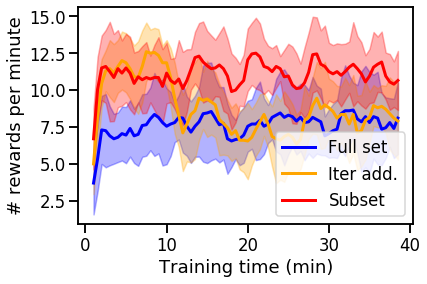

In [11]:
colors = ['blue', 'orange', 'red']

#just an example
window_stamps = window_stamps_all[0,0,:] / fps


plot_fill_in_between(window_stamps,
                    reward_rate_mean,
                    reward_rate_std,
                    xlabel = 'Training time (min)',
                    ylabel = '# rewards per minute',
                    legend = ['Full set', 'Iter add.', 'Subset'])


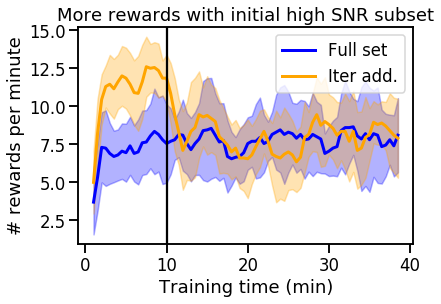

In [12]:
fig, ax = plot_fill_in_between(window_stamps,
                    reward_rate_mean[:2, :],
                    reward_rate_std[:2, :],
                    colors = ['blue', 'orange'],
                    xlabel = 'Training time (min)',
                    ylabel = '# rewards per minute',
                    legend = ['Full set', 'Iter add.'])

ax.set_title('More rewards with initial high SNR subset')

TIME_START_ITERATION = 10

ax.axvline(TIME_START_ITERATION, color = 'k')

In [14]:


import importlib
import convergence_analysis
importlib.reload(convergence_analysis)
from convergence_analysis import calc_cosine_sim_bet_two_matrices, calc_cosine_to_target_matrix



active_angles_list = list()

least_num_updates = 180

for i,e in enumerate(exp_conds):
    feature_selection_data = exp_data_all[i]['feature_selection']
    enc_directions = feature_selection_data['sim_C']
    dec_directions = feature_selection_data['K_mat']
    
    no_noise_neuron_ind = feature_selection_data['no_noise_neuron_ind']

    dec_directions = np.moveaxis(dec_directions, 2,1)   
    

    angles_hist = calc_cosine_to_target_matrix(dec_directions,
                                               enc_directions)
    
    active_angles = np.mean(angles_hist[:, no_noise_neuron_ind], axis = 1)
    

    active_angles_list.append(active_angles[:least_num_updates])


/home/sijia-aw/BMi3D_my/lib/python3.8/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [15]:
active_angles_list = np.array(active_angles_list)
active_angles_list = active_angles_list.reshape((3,N_RUNS,-1))

active_angles_mean = np.mean(active_angles_list, axis = 1)
active_angles_std = np.std(active_angles_list, axis = 1)

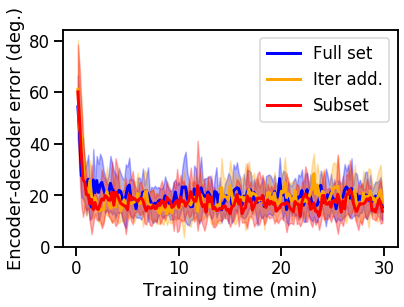

In [16]:
batch_num = np.arange(active_angles_mean.shape[1]) * 10 / 60

fig, ax = plot_fill_in_between(batch_num,
                    active_angles_mean,
                    active_angles_std,
                    #colors = ['blue', 'orange'],
                    xlabel = 'Training time (min)',
                    ylabel = 'Encoder-decoder error (deg.)',
                    legend = ['Full set', 'Iter add.','Subset'])

#ax.set_title('More rewards with initial high SNR subset')


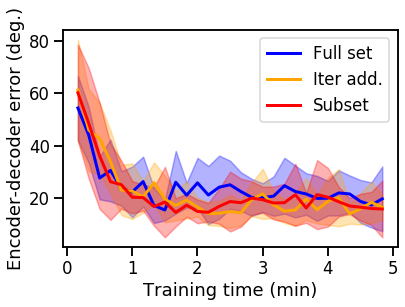

In [59]:
batch_num = np.arange(active_angles_mean.shape[1]) * 10 / 60

initial_batches = 30

fig, ax = plot_fill_in_between(batch_num[:initial_batches],
                    active_angles_mean[:,:initial_batches],
                    active_angles_std[:,:initial_batches],
                    #colors = ['blue', 'orange'],
                    xlabel = 'Training time (min)',
                    ylabel = 'Encoder-decoder error (deg.)',
                    legend = ['Full set', 'Iter add.','Subset'])

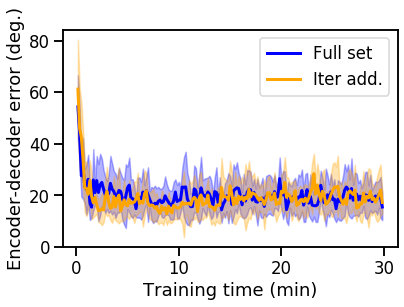

In [18]:
batch_num = np.arange(active_angles_mean.shape[1]) * 10 / 60

num_conds = 2

fig, ax = plot_fill_in_between(batch_num,
                    active_angles_mean[:num_conds,:],
                    active_angles_std[:num_conds,:],
                    colors = ['blue', 'orange'],
                    xlabel = 'Training time (min)',
                    ylabel = 'Encoder-decoder error (deg.)',
                    legend = ['Full set', 'Iter add.'])

ax.set_title('More rewards with initial high SNR subset')


(0.016666666666666635,
 3.3166666666666664,
 4.882556721041919,
 83.99200825528331)

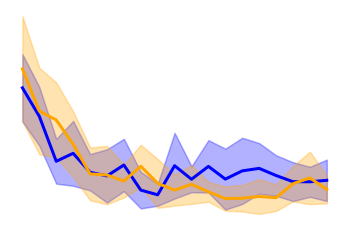

In [29]:
batch_num = np.arange(active_angles_mean.shape[1]) * 10 / 60

initial_batches = 20

fig, ax = plot_fill_in_between(batch_num[:initial_batches],
                    active_angles_mean[:2,:initial_batches],
                    active_angles_std[:2,:initial_batches],
                    colors = ['blue', 'orange'],
                    xlabel = 'Training time (min)')

ax.axis("off")

In [5]:
N_RUNS = 10
n_neurons = [128]
 
sim_data = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/'


within_sim_data = "diff_neurons/"
preproc_sim_data = "diff_neurons_preproc/"

data_dump_folder = sim_data + within_sim_data
preproc_folder = sim_data + preproc_sim_data

percent_high_SNR_noises = [0.7]
random_seed = range(10)

exp_conds_add = [f'iter_{0.7}_{r}_{nn}' for nn in n_neurons for r in random_seed]
exp_conds_keep = [f'same_{0.7}_{r}_{nn}' for nn in n_neurons for r in random_seed]
exp_conds = [f'wo_FS_{0.7}_{r}_{nn}' for nn in n_neurons for r in random_seed]

exp_conds.extend(exp_conds_add)
exp_conds.extend(exp_conds_keep)

for e in exp_conds: print(e)

wo_FS_0.7_0_128
wo_FS_0.7_1_128
wo_FS_0.7_2_128
wo_FS_0.7_3_128
wo_FS_0.7_4_128
wo_FS_0.7_5_128
wo_FS_0.7_6_128
wo_FS_0.7_7_128
wo_FS_0.7_8_128
wo_FS_0.7_9_128
iter_0.7_0_128
iter_0.7_1_128
iter_0.7_2_128
iter_0.7_3_128
iter_0.7_4_128
iter_0.7_5_128
iter_0.7_6_128
iter_0.7_7_128
iter_0.7_8_128
iter_0.7_9_128
same_0.7_0_128
same_0.7_1_128
same_0.7_2_128
same_0.7_3_128
same_0.7_4_128
same_0.7_5_128
same_0.7_6_128
same_0.7_7_128
same_0.7_8_128
same_0.7_9_128


In [6]:
preproc_feature_selection_data(data_dump_folder, 
                               exp_conds,
                              preproc_folder)

File preproc_wo_FS_0.7_0_128.h5 already preprocessed, doing nothing.
finished processing wo_FS_0.7_0_128
finished processing wo_FS_0.7_1_128
finished processing wo_FS_0.7_2_128
finished processing wo_FS_0.7_3_128
finished processing wo_FS_0.7_4_128
finished processing wo_FS_0.7_5_128
finished processing wo_FS_0.7_6_128
finished processing wo_FS_0.7_7_128
finished processing wo_FS_0.7_8_128
finished processing wo_FS_0.7_9_128
File preproc_iter_0.7_0_128.h5 already preprocessed, doing nothing.
finished processing iter_0.7_0_128
finished processing iter_0.7_1_128
finished processing iter_0.7_2_128
finished processing iter_0.7_3_128
finished processing iter_0.7_4_128
finished processing iter_0.7_5_128
finished processing iter_0.7_6_128
finished processing iter_0.7_7_128
finished processing iter_0.7_8_128
finished processing iter_0.7_9_128
File preproc_same_0.7_0_128.h5 already preprocessed, doing nothing.
finished processing same_0.7_0_128
finished processing same_0.7_1_128
finished proces

In [17]:
import importlib
import convergence_analysis
importlib.reload(convergence_analysis)
from convergence_analysis import calc_cosine_sim_bet_two_matrices, calc_cosine_to_target_matrix




neuron_128_iterator = iter_proc_files(preproc_folder,
                                     exp_conds)

active_angles_list = list()

least_num_updates = 180

for i,(d,m) in enumerate(neuron_128_iterator):
    
    exp_data = d
    feature_selection_data = d['feature_selection']
    enc_directions = feature_selection_data['sim_C']
    dec_directions = feature_selection_data['K_mat']
    
    no_noise_neuron_ind = feature_selection_data['no_noise_neuron_ind']

    dec_directions = np.moveaxis(dec_directions, 2,1)   
    

    angles_hist = calc_cosine_to_target_matrix(dec_directions,
                                               enc_directions)
    
    active_angles = np.mean(angles_hist[:, no_noise_neuron_ind], axis = 1)
    

    active_angles_list.append(active_angles[:least_num_updates])
    print(active_angles.shape)

(241,)
(241,)
(241,)
(241,)
(241,)
(241,)
(241,)
(241,)
(241,)
(241,)
(241,)
(241,)
(241,)
(241,)
(240,)
(239,)
(241,)
(241,)
(241,)
(241,)
(188,)
(182,)
(189,)
(188,)
(193,)
(188,)
(182,)
(195,)
(180,)
(184,)


In [18]:
active_angles_list = np.array(active_angles_list)
active_angles_list = active_angles_list.reshape((3,N_RUNS,-1))

print(active_angles_list.shape)

active_angles_mean = np.mean(active_angles_list, axis = 1)
active_angles_std = np.std(active_angles_list, axis = 1)

(3, 10, 180)


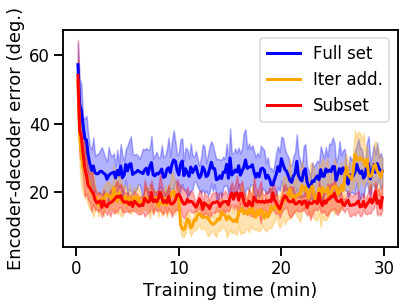

In [21]:
batch_num = np.arange(active_angles_mean.shape[1]) * 10 / 60

fig, ax = plot_fill_in_between(batch_num,
                    active_angles_mean,
                    active_angles_std,
                    #colors = ['blue', 'orange'],
                    xlabel = 'Training time (min)',
                    ylabel = 'Encoder-decoder error (deg.)',
                    legend = ['Full set', 'Iter add.','Subset'])

#ax.set_title('More rewards with initial high SNR subset')

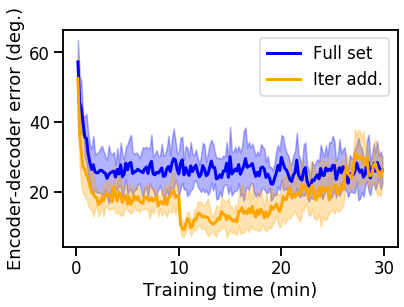

In [23]:
batch_num = np.arange(active_angles_mean.shape[1]) * 10 / 60

fig, ax = plot_fill_in_between(batch_num,
                    active_angles_mean[:2,:],
                    active_angles_std[:2,:],
                    colors = ['blue', 'orange'],
                    xlabel = 'Training time (min)',
                    ylabel = 'Encoder-decoder error (deg.)',
                    legend = ['Full set', 'Iter add.'])


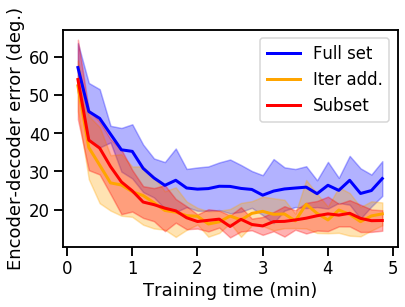

In [22]:
batch_num = np.arange(active_angles_mean.shape[1]) * 10 / 60

initial_batches = 30

fig, ax = plot_fill_in_between(batch_num[:initial_batches],
                    active_angles_mean[:,:initial_batches],
                    active_angles_std[:,:initial_batches],
                    #colors = ['blue', 'orange'],
                    xlabel = 'Training time (min)',
                    ylabel = 'Encoder-decoder error (deg.)',
                    legend = ['Full set', 'Iter add.','Subset'])

## decoder convergence for 512 neurons

In [10]:
N_RUNS = 10

data_512_neurons, preproc_folder_512, exp_conds_512 =\
make_exp_conds(n_neurons=[512],
              random_seeds=range(N_RUNS))

exp_conds_512

['wo_FS_0.7_0_512',
 'wo_FS_0.7_1_512',
 'wo_FS_0.7_2_512',
 'wo_FS_0.7_3_512',
 'wo_FS_0.7_4_512',
 'wo_FS_0.7_5_512',
 'wo_FS_0.7_6_512',
 'wo_FS_0.7_7_512',
 'wo_FS_0.7_8_512',
 'wo_FS_0.7_9_512',
 'iter_0.7_0_512',
 'iter_0.7_1_512',
 'iter_0.7_2_512',
 'iter_0.7_3_512',
 'iter_0.7_4_512',
 'iter_0.7_5_512',
 'iter_0.7_6_512',
 'iter_0.7_7_512',
 'iter_0.7_8_512',
 'iter_0.7_9_512',
 'same_0.7_0_512',
 'same_0.7_1_512',
 'same_0.7_2_512',
 'same_0.7_3_512',
 'same_0.7_4_512',
 'same_0.7_5_512',
 'same_0.7_6_512',
 'same_0.7_7_512',
 'same_0.7_8_512',
 'same_0.7_9_512']

In [5]:
make_exp_conds?

In [82]:
import importlib
import convergence_analysis
importlib.reload(convergence_analysis)
from convergence_analysis import calc_cosine_sim_bet_two_matrices, calc_cosine_to_target_matrix



def calc_no_noise_K_mat_by_iterator(neuron_iterator,
                           harmonize_length = True,
                           info = True):



    

    active_angles_list = list()

    for i,(d,m) in enumerate(neuron_iterator):

        exp_data = d
        feature_selection_data = d['feature_selection']
        enc_directions = feature_selection_data['sim_C']
        dec_directions = feature_selection_data['K_mat']

        no_noise_neuron_ind = feature_selection_data['no_noise_neuron_ind']

        dec_directions = np.moveaxis(dec_directions, 2,1)   


        angles_hist = calc_cosine_to_target_matrix(dec_directions,
                                                   enc_directions)

        active_angles = np.mean(angles_hist[:, no_noise_neuron_ind], axis = 1)


        active_angles_list.append(active_angles)
        
        
        lengths_of_angles = [len(l)
                             for l in active_angles_list]
        
        if info: print(f'finished {i}')
        
    least_num_updates = min(lengths_of_angles)
    most_num_updates = max(lengths_of_angles)
        
        
    
    if harmonize_length:

        
        active_angles_list = list(map(lambda l: l[:least_num_updates],
                                active_angles_list))
        
        active_angles_list = np.array(active_angles_list)
        if info: 
            print(f'harmonize the array length to {least_num_updates}')
            print(f'the angle list is an numpy array with shape {active_angles_list.shape}')
        
        return active_angles_list
    
    if info:
        print(f'return as a angle list \n\
              with min list length of {least_num_updates}\n\
              and max list length of {most_num_updates}')
        
    return active_angles_list

In [59]:
preproc_feature_selection_data(data_512_neurons, 
                               exp_conds_512,
                               preproc_folder_512)

File preproc_wo_FS_0.7_0_512.h5 already preprocessed, doing nothing.
finished processing wo_FS_0.7_0_512
finished processing wo_FS_0.7_1_512
finished processing wo_FS_0.7_2_512
finished processing wo_FS_0.7_3_512
finished processing wo_FS_0.7_4_512
finished processing wo_FS_0.7_5_512
finished processing wo_FS_0.7_6_512
finished processing wo_FS_0.7_7_512
finished processing wo_FS_0.7_8_512
finished processing wo_FS_0.7_9_512
File preproc_iter_0.7_0_512.h5 already preprocessed, doing nothing.
finished processing iter_0.7_0_512
finished processing iter_0.7_1_512
finished processing iter_0.7_2_512
finished processing iter_0.7_3_512
finished processing iter_0.7_4_512
finished processing iter_0.7_5_512
finished processing iter_0.7_6_512
finished processing iter_0.7_7_512
finished processing iter_0.7_8_512
finished processing iter_0.7_9_512
File preproc_same_0.7_0_512.h5 already preprocessed, doing nothing.
finished processing same_0.7_0_512
finished processing same_0.7_1_512
finished proces

In [83]:
neuron_512_iterator = iter_proc_files(preproc_folder_512,
                                     exp_conds_512)


active_angle_list = \
calc_no_noise_K_mat_by_iterator(neuron_512_iterator)

finished 0
finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9


/home/sijia-aw/BMi3D_my/lib/python3.8/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


finished 10
finished 11
finished 12
finished 13
finished 14
finished 15
finished 16
finished 17
finished 18
finished 19
finished 20
finished 21
finished 22
finished 23
finished 24
finished 25
finished 26
finished 27
finished 28
finished 29
harmonize the array length to 128
the angle list is an numpy array with shape (30, 128)


(3, 10, 128)


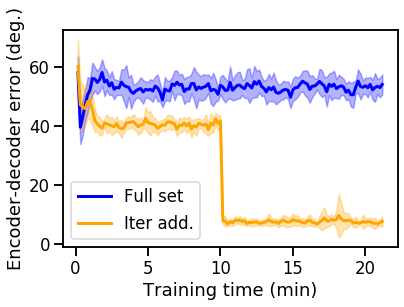

In [87]:
active_angles_512neurons = active_angle_list.reshape((3,N_RUNS,-1))

print(f'{active_angles_512neurons.shape}')

active_angles_mean = np.mean(active_angles_512neurons, axis = 1)
active_angles_std = np.std(active_angles_512neurons, axis = 1)



batch_num = np.arange(active_angles_mean.shape[1]) * 10 / 60

fig, ax = plot_fill_in_between(batch_num,
                    active_angles_mean[:2,:],
                    active_angles_std[:2,:],
                    colors = ['blue', 'orange'],
                    xlabel = 'Training time (min)',
                    ylabel = 'Encoder-decoder error (deg.)',
                    legend = ['Full set', 'Iter add.'])

In [89]:
exp_conds_512

['wo_FS_0.7_0_512',
 'wo_FS_0.7_1_512',
 'wo_FS_0.7_2_512',
 'wo_FS_0.7_3_512',
 'wo_FS_0.7_4_512',
 'wo_FS_0.7_5_512',
 'wo_FS_0.7_6_512',
 'wo_FS_0.7_7_512',
 'wo_FS_0.7_8_512',
 'wo_FS_0.7_9_512',
 'iter_0.7_0_512',
 'iter_0.7_1_512',
 'iter_0.7_2_512',
 'iter_0.7_3_512',
 'iter_0.7_4_512',
 'iter_0.7_5_512',
 'iter_0.7_6_512',
 'iter_0.7_7_512',
 'iter_0.7_8_512',
 'iter_0.7_9_512',
 'same_0.7_0_512',
 'same_0.7_1_512',
 'same_0.7_2_512',
 'same_0.7_3_512',
 'same_0.7_4_512',
 'same_0.7_5_512',
 'same_0.7_6_512',
 'same_0.7_7_512',
 'same_0.7_8_512',
 'same_0.7_9_512']

In [11]:
neuron_512_iterator_iter = iter_proc_files(preproc_folder_512,
                                     [exp_conds_512[10]])

exp_data, exp_meta_data = next(neuron_512_iterator_iter)

<class 'matplotlib.axes._subplots.AxesSubplot'>


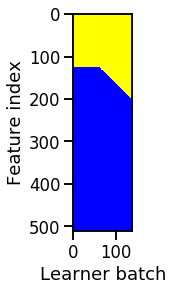

In [14]:
plot_feature_selection(\
    exp_data['feature_selection']['feat_set'])




In [33]:
from convergence_analysis import calc_cosine_to_target_matrix

bmi3d_task = exp_data['bmi3d_task']
feature_selection_data = exp_data['feature_selection']
enc_directions = feature_selection_data['sim_C']
dec_directions = feature_selection_data['K_mat']

no_noise_neuron_ind = feature_selection_data['no_noise_neuron_ind']




dec_directions = np.moveaxis(dec_directions, 2,1)   


angles_hist = calc_cosine_to_target_matrix(dec_directions,
                                           enc_directions)

/home/sijia-aw/BMi3D_my/lib/python3.8/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [48]:
feature_selection_data.keys()

dict_keys(['C_mat', 'K_mat', 'Q_diag', 'assist_level', 'batch_size', 'batch_time', 'feat_set', 'fixed_noise_level', 'half_life', 'init_feat_set', 'n_starting_feats', 'n_states', 'no_noise_neuron_ind', 'noise_mode', 'noise_neuron_ind', 'percent_noise', 'sim_C', 'total_exp_time', 'train_high_SNR_time', 'transform_x_flag', 'transform_y_flag'])

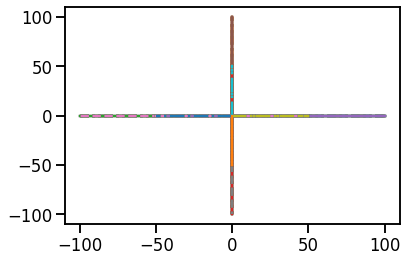

In [17]:
from afs_plotting import plot_prefered_directions

plot_prefered_directions(enc_directions)

In [18]:
K_mat = feature_selection_data['K_mat']
C_mat = feature_selection_data['C_mat']
Q_diag = feature_selection_data['Q_diag']

clda = exp_data['bmi3d_clda']

K_mat = np.moveaxis(K_mat, 2,1)   

In [19]:
feature_selection_data.keys()

dict_keys(['C_mat', 'K_mat', 'Q_diag', 'assist_level', 'batch_size', 'batch_time', 'feat_set', 'fixed_noise_level', 'half_life', 'init_feat_set', 'n_starting_feats', 'n_states', 'no_noise_neuron_ind', 'noise_mode', 'noise_neuron_ind', 'percent_noise', 'sim_C', 'total_exp_time', 'train_high_SNR_time', 'transform_x_flag', 'transform_y_flag'])

In [24]:
def compare_preffered_directions(dec_directions, 
                                 no_noise_neuron_ind = range(128),
                                 index_before = 59,
                                 index_after =61):
    fig, ax = plt.subplots(1,2, figsize = (8,4), sharex = True, sharey = True)

    plot_prefered_directions(dec_directions[index_before,no_noise_neuron_ind,:],
                            ax = ax[0])

    plot_prefered_directions(dec_directions[index_after,no_noise_neuron_ind,:],
                            ax = ax[1])


    fig.tight_layout()
    
    return fig, ax 

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc872af3250>,
       dtype=object))

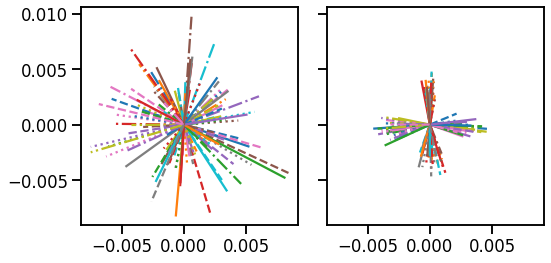

In [25]:
compare_preffered_directions(K_mat)

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86f0375e0>,
       dtype=object))

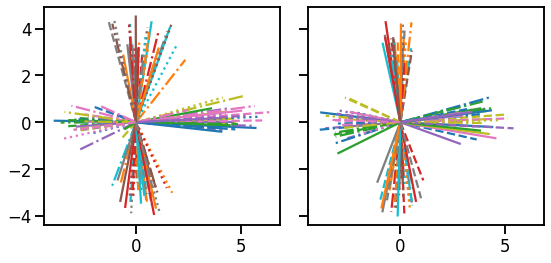

In [26]:
compare_preffered_directions(C_mat, index_before=58, index_after=62 )

In [52]:
C_mat[61,128]

array([ 0.     ,  0.     ,  0.     , -0.40403,  0.     , -0.68344,
        0.36754])

In [51]:
C_mat[61,129]

array([ 0.     ,  0.     ,  0.     , -0.52158,  0.     ,  0.96069,
        1.32906])

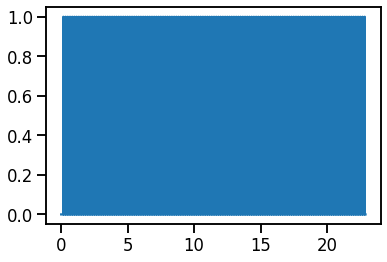

In [151]:
time = np.arange(len(bmi3d_task['update_bmi'])) / 60 / 60
plt.plot(time, bmi3d_task['update_bmi'])

In [187]:
Q_diag.shape

(138, 512)

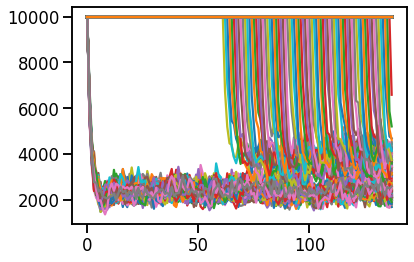

In [188]:
fig, ax = plt.subplots()

ax.plot(Q_diag)

In [31]:
clda = exp_data['bmi3d_clda']

len(clda)

61

In [30]:
clda.dtype

dtype([('kf_C', '<f8', (128, 7)), ('kf_Q', '<f8', (128, 128)), ('kf_C_xpose_Q_inv_C', '<f8', (7, 7)), ('kf_C_xpose_Q_inv', '<f8', (7, 128)), ('mFR', '<f8', (128,)), ('sdFR', '<f8', (128,)), ('rho', '<f8', (1,)), ('intended_kin', '<f8', (7, 100)), ('spike_counts_batch', '<f8', (128, 100))])

In [ ]:
kf_C

In [191]:
cursor= bmi3d_task['cursor']

In [34]:
bmi3d_task.dtype

dtype([('cursor', '<f8', (3,)), ('obs_t', '<f8', (512, 1)), ('KC', '<f8', (7, 7)), ('pred_state_mean', '<f8', (7, 1)), ('post_state_mean', '<f8', (7, 1)), ('pred_state_P', '<f8', (7, 7)), ('post_state_P', '<f8', (7, 7)), ('loop_time', '<f8', (1,)), ('decoder_state', '<f8', (7, 1)), ('internal_decoder_state', '<f8', (7, 1)), ('target_state', '<f8', (7, 1)), ('update_bmi', '<f8', (1,)), ('spike_counts', '<f8', (512, 1)), ('bin_edges', '<f8', (2,)), ('ctrl_input', '<f8', (7,)), ('assist_level', '<f8', (1,)), ('trial', '<u4', (1,)), ('plant_visible', '?', (1,)), ('target', '<f8', (3,)), ('target_index', '<i4', (1,))])

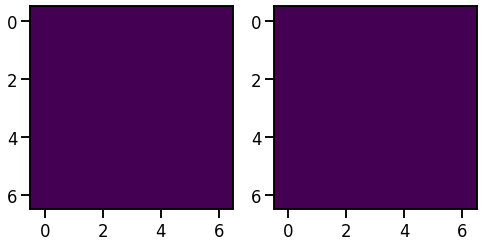

In [45]:
before_state_cov = bmi3d_task['pred_state_P'][36599]
after_state_cov = bmi3d_task['pred_state_P'][36601]

before_change_state_cov.shape, after_state_cov.shape


fig_cov, ax_cov = plt.subplots(1,2, figsize = (8,4))
ax_cov[0].imshow(before_change_state_cov)

ax_cov[1].imshow(after_state_cov)

In [46]:
before_state_cov

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [192]:
cursor.shape

(82430, 3)

In [194]:
def plot_cursor_before_and_after(cursor, time_at, before, after, fps = 60,  ax = None):
    
    if ax is None: fig, ax = plt.subplots()
        
    time_at = int(time_at * fps)
    before = int(before * fps)
    after = int(after * fps)
    
    selected_cursor = cursor[(time_at - before): (time_at + after), : ]
    
    
    ax.plot(selected_cursor[:,0] , selected_cursor[:, 2])

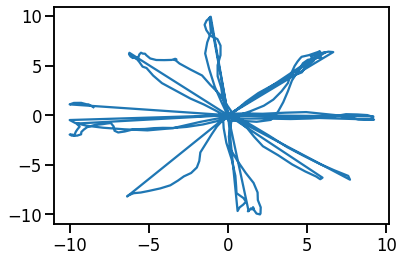

In [200]:

plot_cursor_before_and_after(cursor, 600, 30, 0)

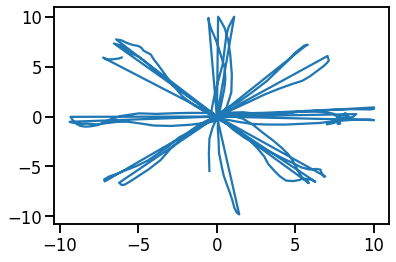

In [199]:

plot_cursor_before_and_after(cursor, 600, 0, 30)

In [53]:
feature_selection_data.keys()

dict_keys(['C_mat', 'K_mat', 'Q_diag', 'assist_level', 'batch_size', 'batch_time', 'feat_set', 'fixed_noise_level', 'half_life', 'init_feat_set', 'n_starting_feats', 'n_states', 'no_noise_neuron_ind', 'noise_mode', 'noise_neuron_ind', 'percent_noise', 'sim_C', 'total_exp_time', 'train_high_SNR_time', 'transform_x_flag', 'transform_y_flag'])

In [54]:
C_mat.shape

(138, 512, 7)

# Compare trajectories

In [6]:
N_RUNS = 10
n_neurons = [32, 128, 512, 1024]
 
sim_data = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/'


within_sim_data = "diff_neurons/"
preproc_sim_data = "diff_neurons_preproc/"

data_dump_folder = sim_data + within_sim_data
preproc_folder = sim_data + preproc_sim_data

percent_high_SNR_noises = [0.7]
random_seed = [0]

exp_conds_add = [f'iter_{0.7}_{r}_{nn}' for nn in n_neurons for r in random_seed]
#exp_conds_keep = [f'same_{0.7}_{r}_{nn}' for nn in n_neurons for r in random_seed]
exp_conds = [f'wo_FS_{0.7}_{r}_{nn}' for nn in n_neurons for r in random_seed]

exp_conds.extend(exp_conds_add)
#exp_conds.extend(exp_conds_keep)

for e in exp_conds: print(e)

wo_FS_0.7_0_32
wo_FS_0.7_0_128
wo_FS_0.7_0_512
wo_FS_0.7_0_1024
iter_0.7_0_32
iter_0.7_0_128
iter_0.7_0_512
iter_0.7_0_1024


In [7]:
preproc_feature_selection_data(data_dump_folder, 
                               exp_conds,
                              preproc_folder)

File preproc_wo_FS_0.7_0_32.h5 already preprocessed, doing nothing.
File preproc_wo_FS_0.7_0_128.h5 already preprocessed, doing nothing.
File preproc_wo_FS_0.7_0_512.h5 already preprocessed, doing nothing.
File preproc_iter_0.7_0_32.h5 already preprocessed, doing nothing.
File preproc_iter_0.7_0_128.h5 already preprocessed, doing nothing.
File preproc_iter_0.7_0_512.h5 already preprocessed, doing nothing.


TypeError: cannot unpack non-iterable NoneType object

## Trial segments and trajectories

In [20]:
CENTER_TARGET_ON = 16
CURSOR_ENTER_CENTER_TARGET = 80
CENTER_TARGET_OFF = 32
REWARD = 48
DELAY_PENALTY = 66
TIMEOUT_PENALTY = 65
HOLD_PENALTY = 64
TRIAL_END = 239

import functools

def get_all_cursor_trajectories(exp_data_all, start_code = [20], end_codes = [REWARD, HOLD_PENALTY]):
    
    cursor_trajectories_list = list()
        
    for e in exp_data_all:
        (cursor_trajectories, trial_segments, trial_times) = \
        get_cursor_trajectories_from_parsed_data(e, start_code = start_code, end_codes=end_codes)
        cursor_trajectories_list.append(cursor_trajectories)

    
    return cursor_trajectories_list


def iter_all_cursor_trajectories(exp_data_gen, 
                                 start_code = [20],
                                end_codes = [REWARD, HOLD_PENALTY]):
    
    cursor_trajectories_list = list()
    for exp_data, exp_meta_data in exp_data_gen:
        (cursor_trajectories, trial_segments, trial_times) = \
        get_cursor_trajectories_from_parsed_data(exp_data, start_code = start_code, end_codes=end_codes)
        
        cursor_trajectories_list.append(cursor_trajectories)

    
    return cursor_trajectories_list

        

def get_cursor_trajectories_from_parsed_data(exp_data, start_code = [20], end_codes = [REWARD, HOLD_PENALTY]):
    
    
    events = exp_data['events']
    cursor_kinematics = exp_data['task']['cursor'][:,[0,2]] # cursor (x, z, y) position on each bmi3d cycle

    streamed_code = events['code']
    event_cycles = events['time'] # confusingly, 'time' here refers to cycle count

    trial_segments, trial_times = aopy.preproc.get_trial_segments(streamed_code, event_cycles, start_code,  end_codes)
    trial_segments = np.array(trial_segments)
    trial_indices = [range(t[0], t[1]) for t in trial_times]
    cursor_trajectories = [cursor_kinematics[t] for t in trial_indices]
    
    return (cursor_trajectories, trial_segments, trial_times)

In [21]:
start_codes = range(17, 24)
print(start_codes)

exp_data_gen = iter_proc_files(preproc_folder, 
                               exp_conds)


cursor_trajectories_list = \
iter_all_cursor_trajectories(exp_data_gen, 
                            start_code=start_codes)


range(17, 24)


In [48]:
def calc_trial_times(trial_times):
    """
    for each row, calculate the difference between the last and first elements
    """
    row_index = 1 
    
    return np.apply_along_axis(lambda row: row[-1] - row[0], row_index, trial_times)


#calc_trial_times(trial_times)

In [36]:
# get the unique target positions

from typing import List, Dict
import seaborn as sns


def plot_cursor_trajectories(cursor_trajectories: List, 
                             exp_data:Dict, 
                             exp_metadata,
                             N_TRIALS = 10,
                             ax = None):

    if cursor_trajectories is not np.ndarray:
        cursor_trajectories = np.asarray(cursor_trajectories)
    
    N_ROWS, N_COLUMNS = cursor_trajectories.shape 
    
    if ax is None: 
        fig, ax = plt.subplots(N_ROWS,
                               N_COLUMNS,
                               figsize=(4 * N_COLUMNS,
                                        4 * N_ROWS),
                               sharex = True, 
                               sharey = True,
                              squeeze = False)

    trials = exp_data['trials']
    trial_targets = aopy.postproc.get_trial_targets(trials['trial'], trials['target'][:,[0,2]]) # (x, z, y) -> (x, y)
    unique_targets = np.unique(np.concatenate(([t[1] for t in trial_targets], trial_targets[0])), axis=0)


    target_radius =  exp_metadata['target_radius']
    bounds = [-11, 11, -11, 11]
    
    sns.color_palette("dark:salmon_r", as_cmap=True)
    
    for i in range(N_ROWS):
        for j in range(N_COLUMNS):

            aopy.visualization.plot_trajectories(cursor_trajectories[i,j][:N_RUNS], bounds = bounds, ax = ax[i,j])
            aopy.visualization.plot_targets(unique_targets, target_radius, ax = ax[i,j])
            
    return fig, ax

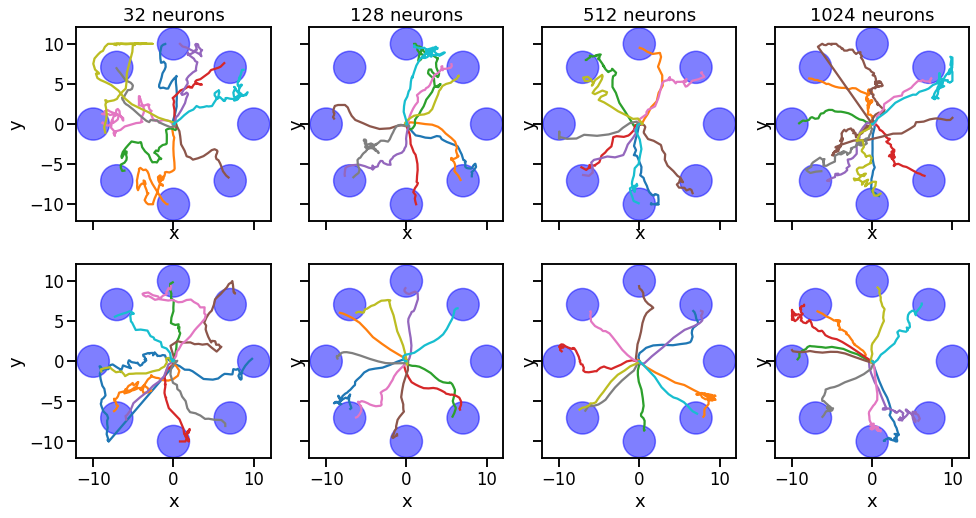

In [41]:
cursor_trajectories_list = np.array(cursor_trajectories_list).reshape(2, -1)

exp_data_gen = iter_proc_files(preproc_folder, 
                               [exp_conds[0]])

exp_data, exp_metadata = next(exp_data_gen)


fig,ax = plot_cursor_trajectories(cursor_trajectories_list, exp_data, exp_metadata)

for i,nn in enumerate(n_neurons):
    ax[0,i].set_title(f'{nn} neurons')
    

# Post data analysis

# Behaviour  analyses

## Trajectory analysis

In [44]:
def calculate_traj_length(trajectories):
    """
    given a list of trajectories, calculate each trajectory's length
    
    args:
        trajectories[np.ndarray]: number of data points by number of dims
    """
    traj_length = np.empty((len(trajectories)))
    
    for i,t in enumerate(trajectories):
        delta = np.diff(t, axis = 0)
        
        
        delta_length = delta**2
        
        
        delta_sum = np.sum(delta_length, axis = 1) ** (1/2)
        
        delta_sum = np.sum(delta_sum)
        
        traj_length[i] = delta_sum
        
    return traj_length
        
        

def test_calculate_traj_length():
    
    
    #test a line segment length
    cursor_trajectory = np.arange(0,1, 0.1).reshape(-1,1)
    expected_trajectory_length = np.array([0.9])
    calculated_trajectory_length = calculate_traj_length([cursor_trajectory])
    
    np.testing.assert_array_equal(expected_trajectory_length, calculated_trajectory_length)
    
    
test_calculate_traj_length()    

30
(10,)
(10,)
(10,)


Text(0.5, 0, 'Trial #')

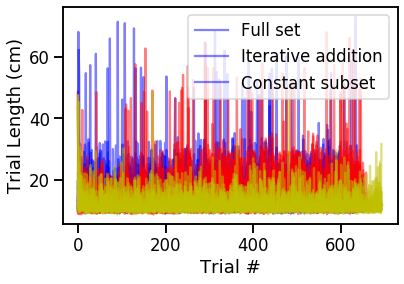

In [54]:


cursor_length = [calculate_traj_length(t) for t in cursor_trajectories_list]

cursor_length_array = np.asarray(cursor_length).reshape(3, N_RUNS)

colors =  ['b','r', 'y']

print(len(cursor_length))
for t,c in zip(cursor_length_array, colors):
    print(t.shape)
    for l in t:
        plt.plot(l, color = c, alpha = 0.5)

plt.legend(['Full set','Iterative addition', 'Constant subset'])
plt.ylabel('Trial Length (cm)')

plt.xlabel('Trial #')

## Variance analysis

# Kalman filter

## encoder

the job of the encoder is to directly encode intention into firing rates
the direct measure is just pearson correlation coefficients between 
the intentions and the firing rates

## decoder

In [55]:
exp_data_all[0]['feature_selection'].keys()

dict_keys(['C_mat', 'K_mat', 'Q_diag', 'assist_level', 'batch_size', 'batch_time', 'feat_set', 'fixed_noise_level', 'half_life', 'n_starting_feats', 'n_states', 'no_noise_neuron_ind', 'noise_mode', 'noise_neuron_ind', 'percent_noise', 'sim_C', 'total_exp_time', 'transform_x_flag', 'transform_y_flag'])

(300, 128, 7)


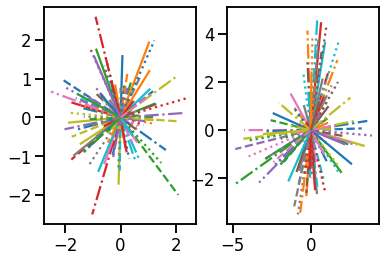

In [56]:
from afs_plotting import plot_prefered_directions

C_mat = exp_data_all[2]['feature_selection']['C_mat']

print(C_mat.shape)



fig, ax = plt.subplots(1,2)

plot_prefered_directions(C_mat[0], ax = ax[0])
plot_prefered_directions(C_mat[-1], ax = ax[1])

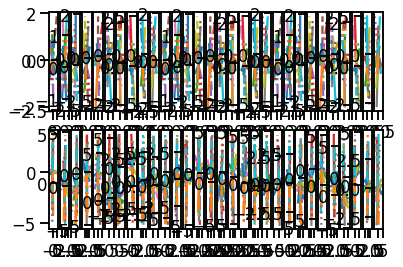

In [57]:
from afs_plotting import plot_prefered_directions

def plot_all_initial_C_mat(exp_data_all, selected_neuron = 'all',debug = True):
    
    """
    just compare initial C mat with the last C_mat
    """
    
    N_EXP = len(exp_data_all)
    
    fig, ax = plt.subplots(2, N_EXP)
    
    for i in range(N_EXP):
        C_mat = exp_data_all[i]['feature_selection']['C_mat']
        plot_prefered_directions(C_mat[0][no_noise_neuron_ind,:], ax = ax[0,i])
        plot_prefered_directions(C_mat[-1][no_noise_neuron_ind,:], ax = ax[1,i])
        

plot_all_initial_C_mat(exp_data_all)


## Decoder compared to the encoder



In [ ]:
exp_data_all[0].keys()

In [ ]:
exp_data_all.shape

In [62]:
import importlib
import convergence_analysis
importlib.reload(convergence_analysis)
from convergence_analysis import calc_cosine_sim_bet_two_matrices, calc_cosine_to_target_matrix

active_angles_list = list()

least_num_updates = 180

for i,e in enumerate(exp_conds):
    feature_selection_data = exp_data_all[i]['feature_selection']
    enc_directions = feature_selection_data['sim_C']
    dec_directions = feature_selection_data['C_mat']
    
    angles_hist = calc_cosine_to_target_matrix(dec_directions, enc_directions)
    
    active_angles = np.mean(angles_hist[:, no_noise_neuron_ind], axis = 1)
    active_angles_list.append(active_angles[:least_num_updates])


(3, 180)


<Figure size 432x288 with 0 Axes>

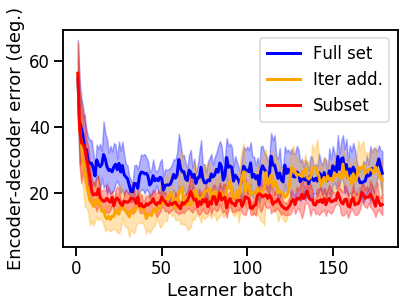

In [71]:

active_angles_list = np.array(active_angles_list) 


active_angles_list_reshape = active_angles_list.reshape((3,N_RUNS,-1))

active_angles_std = np.std(active_angles_list_reshape, axis = 1)
active_angles_mean =  np.mean(active_angles_list_reshape, axis = 1)


plt.figure()

batch_num = np.arange(active_angles_mean.shape[1])


colors = ['blue', 'orange', 'red'] 

print(active_angles_mean.shape)

fig_C, ax_C = plt.subplots()


for i,c in enumerate(colors):

    plt.plot(active_angles_mean[i,:].T, color = c, linewidth = 3)
    plt.fill_between(batch_num,
                    active_angles_mean[i,:] + active_angles_std[i,:],
                    active_angles_mean[i,:] - active_angles_std[i,:],
                    alpha = 0.3, color = c)

plt.xlabel('Learner batch')
plt.ylabel('Encoder-decoder error (deg.)')
plt.legend(['Full set', 'Iter add.', 'Subset'])

## batch update 

In [ ]:
import sympy as sp

intended_kin = clda_log['intended_kin']
spike_counts_batch = clda_log['spike_counts_batch']
kf_C = clda_log['kf_C']

i =  0

# fit the batch data

from riglib.bmi.kfdecoder import KalmanFilter

feature_selection_data = exp_data_all[0]['feature_selection']
sim_C = feature_selection_data['sim_C']

def train_C_mat_on_batch_data(intended_kin, spike_counts_batch):

    C_hat_list = list()
    
    num_times =  intended_kin.shape[0]
    
    for i  in range(num_times):

        k = intended_kin[i, :,:]
        s = spike_counts_batch[i,:,:]

        C,Q = KalmanFilter.MLE_obs_model(k, s, include_offset=False, drives_obs=[3,5])

        C_hat_list.append(C)



    C_hat_list = np.array(C_hat_list)
    
    return C_hat_list
    
    
    
for i in range(9): 
    clda_log = exp_data_all[i]['bmi3d_clda']
    intended_kin = clda_log['intended_kin']
    spike_counts_batch = clda_log['spike_counts_batch']
    print(clda_log.shape)
    
#     C_hat_list = train_C_mat_on_batch_data(intended_kin, spike_counts_batch)
    
#     print(C_hat_list.shape)
#     C_hat_mean = np.mean(C_hat_list, axis = 0)
#     angles = calc_cosine_sim_bet_two_matrices(C_hat_mean, sim_C)

    
    #plt.plot(angles)





In [ ]:
np.sum(exp_data_all[1]['bmi3d_task']['update_bmi'])


## looking at K matrix

In [ ]:
NUM_EXP = 3
GLOBAL_FIGURE_VERTICAL_SIZE  = 4

figure_k_matrix, axes_k_matrix = plt.subplots(2,NUM_EXP,
                                          figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * NUM_EXP,
                                                    GLOBAL_FIGURE_VERTICAL_SIZE * 2))
exp_data_all_reshaped = exp_data_all.reshape(3, N_RUNS)


#compare the K matrix before the exp
for i in range(NUM_EXP):
    K_mat = exp_data_all_reshaped[0,i]['feature_selection']['K_mat']
    K = K_mat[1].T

    plot_prefered_directions(K, ax  = axes_k_matrix[0, i], plot_states = [0,2])
    axes_k_matrix[0, i].set_title(exp_conds[i])

#compare to the matrix after the exp
for i in range(3):
    K_mat = exp_data_all[i]['feature_selection']['K_mat']
    
    K = K_mat[-1].T
    plot_prefered_directions(K, ax  = axes_k_matrix[1, i], plot_states = [0,2])
    axes_k_matrix[1,i].set_title(exp_conds[i])
figure_k_matrix.tight_layout()

In [ ]:



def plot_state_bar(K:np.ndarray, ax =  None, fig = fig, state_names = None):
    """
    K [np.array]: a state variable that records the state
    """
    
    num_state, num_var = K.shape
    
    if num_state >= num_var: print(f'Number of states {num_state} is greater than the {num_var} \n is this intended?')
        
    if ax is None: fig, ax = plt.subplots(2, 3, figsize = (12, 8),sharex =  True)
        
    var_pos = np.arange(num_var)
    
    for i in range(3):
        ax[0, i].bar(var_pos, K[i,:])
        ax[1,i].bar(var_pos, K[i + 3,:])
        
        
        
    fig.tight_layout()
    
    return ax


fig, ax = plt.subplots(2,3, figsize = (12,8))


for i in range(len(exp_data_all)):
    K_mat = exp_data_all[i]['feature_selection']['K_mat']
    K = K_mat[-1]

    plot_state_bar(abs(K), ax = ax, fig = fig)

In [64]:
active_feat_set = feature_selection_data['feat_set']
active_feat_set_last = active_feat_set[0]
active_angles_list = list()

least_num_updates = 180

for i,e in enumerate(exp_conds):
    feature_selection_data = exp_data_all[i]['feature_selection']
    enc_directions = feature_selection_data['sim_C']
    dec_directions = feature_selection_data['K_mat']

    dec_directions = np.moveaxis(dec_directions, 2,1)   
    

    angles_hist = calc_cosine_to_target_matrix(dec_directions,
                                               enc_directions)
    
    active_angles = np.mean(angles_hist[:, no_noise_neuron_ind], axis = 1)
    

    active_angles_list.append(active_angles[:least_num_updates])


/home/sijia-aw/BMi3D_my/lib/python3.8/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


(3, 180)


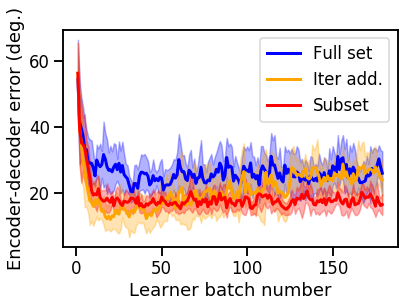

In [72]:

active_angles_list = np.array(active_angles_list)
active_angles_list = active_angles_list.reshape((3,N_RUNS,-1))

active_angles_mean = np.mean(active_angles_list, axis = 1)
active_angles_std = np.std(active_angles_list, axis = 1)

colors = ['blue', 'orange', 'red'] 

print(active_angles_mean.shape)

fig_C, ax_C = plt.subplots()



for i,c in enumerate(colors):

    plt.plot(active_angles_mean[i,:].T, color = c, linewidth = 3)
    plt.fill_between(batch_num,
                    active_angles_mean[i,:] + active_angles_std[i,:],
                    active_angles_mean[i,:] - active_angles_std[i,:],
                    alpha = 0.3, color = c)


plt.xlabel('Learner batch number')
plt.ylabel('Encoder-decoder error (deg.)')
plt.legend(['Full set', 'Iter add.', 'Subset'])

(3, 180)


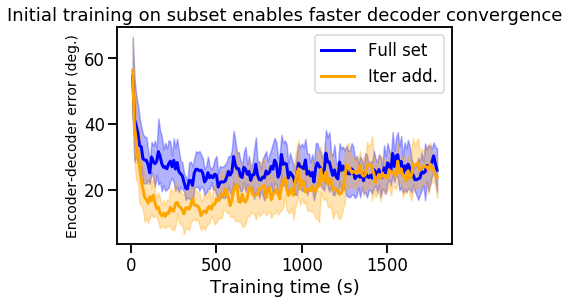

In [73]:
fig_C, ax_C = plt.subplots()


colors = ['blue', 'orange'] 

batch_num = np.arange(least_num_updates) * 10

print(active_angles_mean.shape)

for i,c in enumerate(colors):

    plt.plot(batch_num, active_angles_mean[i,:].T, color = c, linewidth = 3)
    plt.fill_between(batch_num,
                    active_angles_mean[i,:] + active_angles_std[i,:],
                    active_angles_mean[i,:] - active_angles_std[i,:],
                    alpha = 0.3, color = c)

plt.title('Initial training on subset enables faster decoder convergence')
plt.xlabel('Training time (s)')
plt.ylabel('Encoder-decoder error (deg.)', fontsize = 14)
plt.legend(['Full set', 'Iter add.'])

In [ ]:
# examine the features after the first update.

def find_K_gain(index:int, update_period: float, fps = 60):
    """
    find the latest Kalman gain
    """
    update_frame_count = int(update_period * fps)
    
    return int(index // update_frame_count)
    
def test_find_K_gain():
    
    assert 0 == find_K_gain(598, 10, 60)
    assert 1 == find_K_gain(1198, 10, 60)

test_find_K_gain()

In [ ]:
update_time = 600

spike_counts = exp_data_all[0]['bmi3d_task']['spike_counts']
spike_counts = np.squeeze(spike_counts)

spike_counts_single_time = spike_counts[update_time, :]

target_state  = exp_data_all[0]['bmi3d_task']['target_state']
target_state_time = target_state[update_time, :]


num_K = find_K_gain(update_time, update_period = 10)
K_mat_time = K_mat[num_K]

feature_state_update = K_mat_time @  np.diag(spike_counts_single_time)


target_state_time_rep = np.tile(target_state_time, len(spike_counts_single_time))


useful_update = feature_state_update * target_state_time_rep
useful_update = np.sum(useful_update, axis = 0)


plt.plot(useful_update)


In [ ]:
intended_kin = exp_data_all[0]['bmi3d_clda']['intended_kin']

spike_counts_batch = exp_data_all[0]['bmi3d_clda']['spike_counts_batch']
spike_counts_batch =  np.swapaxes(spike_counts_batch, 2, 1)

intended_kin = np.swapaxes(intended_kin, 2, 1)

spike_counts_batch.shape

In [ ]:
print(intended_kin.shape)

intended_kin_one = intended_kin[1, 1, :]
print(intended_kin_one)

## Q mat

In [ ]:
feature_selection_data.keys()

In [ ]:
fig_Q, axes_Q = plt.subplots(1,2, sharey = True)

num_noises = 1

from afs_plotting import get_cmap
import matplotlib as mpl

cmap_q = get_cmap(num_noises)

cmap_q_1 = get_cmap(num_noises, mpl.cm.Oranges)

cmap_q_2 = get_cmap(num_noises, mpl.cm.Reds)

for i in range(num_noises):
    
    for j in range(3):


        Q_list = np.array(exp_data_all[j]["feature_selection"]['Q_diag'])



        Q_diag_no_noise = np.mean(Q_list[:, no_noise_neuron_ind], axis = 1)

        Q_diag_noise = np.mean(Q_list[:, noise_neuron_ind], axis = 1)



        axes_Q[0].plot(Q_diag_noise)

        axes_Q[1].plot(Q_diag_no_noise)

    

axes_Q[0].set_xlabel('Time (s)')

axes_Q[1].set_xlabel('Time (s)')



axes_Q[0].set_title('Low SNR neurons')

axes_Q[1].set_title('High SNR neurons')



# Feature analysis

In [ ]:
decoder_state = exp_data_all[0]['bmi3d_task']['decoder_state']
target_state = exp_data_all[0]['bmi3d_task']['target_state']
spike_counts = exp_data_all[0]['bmi3d_task']['spike_counts']


print(decoder_state.shape)
print(target_state.shape)
print(spike_counts.shape)

spike_counts = exp_data_all[0]['bmi3d_task'].dtype

In [ ]:
exp_data_all[0]['bmi3d_task'].dtype

In [ ]:
exp_data_all[0]['feature_selection']['K_mat'].shape

In [ ]:
exp_data_all[0]['bmi3d_task']['update_bmi']

In [ ]:
np.argwhere((exp_data_all[0]['bmi3d_task']['update_bmi']))

## examine used C mat

In [ ]:
GLOBAL_FIGURE_VERTICAL_SIZE  =  10

fig_compr_means, axes_compr_means = plt.subplots(1, N_TYPES_OF_NEURONS,
                                                figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * N_TYPES_OF_NEURONS,
                                                          GLOBAL_FIGURE_VERTICAL_SIZE),
                                                sharey = True)
selected_feature_set = no_noise_neuron_list

for i,a in enumerate(axes_compr_means):

    type_neuron_list = neuron_type_bool_list[i]
    
    for C in C_mat_all:


        the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(C, 
                                                                                                         target_C = enc_directions)


        selected_neurons = np.logical_and(selected_feature_set, type_neuron_list)

        selected_mean = np.mean(the_history_of_KF_weights_in_time_by_neurons[:,selected_neurons], axis = 1)
        std = np.std(the_history_of_KF_weights_in_time_by_neurons[:,selected_neurons], axis = 1)
        
        line = a.plot(selected_mean)
        
        x_data = np.arange((selected_mean).shape[0])
        
        
        a.fill_between(x_data ,selected_mean - std, selected_mean + std, alpha = 0.1 )
        a.legend(exp_conds)
        
handles, labels = a.get_legend_handles_labels()
fig_compr_means.legend(handles, labels, loc='lower center')
plt.show()
#axes_compr_means.set_title('Means of the high SNR weight trajectory')